<a href="https://colab.research.google.com/github/chauhan557/Hotel-Booking-Analysis/blob/main/Hotel_Booking_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing all essential libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets(Excel)/hotel_bookings.csv')

##**Exploratory Data Analysis**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
df.shape

(119390, 32)

In [ ]:
# The columns we have in the dataset

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# we convert reservation_status_date from object to datetime with format

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
df.describe(include = 'object') # This describe function is used for the object Datatype

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
for i in df.describe(include = 'object'):
    print(i)
    print(df[i].unique())
    print('-'*60)


hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Removing these 2 columns as they contain lots of null values

df.drop(['company','agent'], axis=1, inplace = True)

In [ ]:
# Removing rows which contain some null values

df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


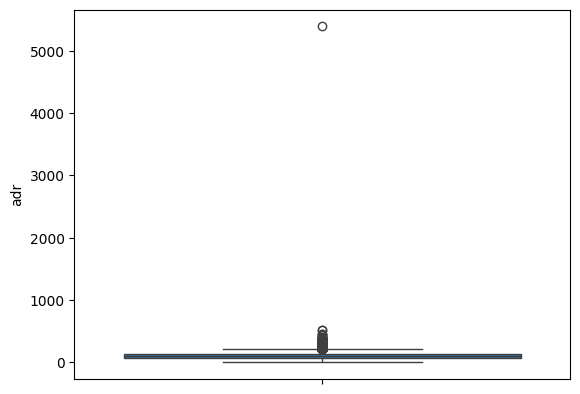

In [ ]:
sns.boxplot(df['adr'])
plt.show()

In [ ]:
df = df[df['adr']<5000]

Now the outlier which is at 5400 got removed

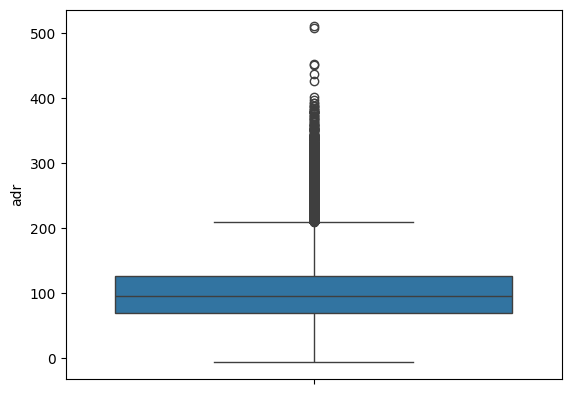

In [ ]:
sns.boxplot(df['adr'])
plt.show()

## **Data Visualization**

In [ ]:
cancelled_percent = df['is_canceled'].value_counts(normalize=True)
print(cancelled_percent)

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


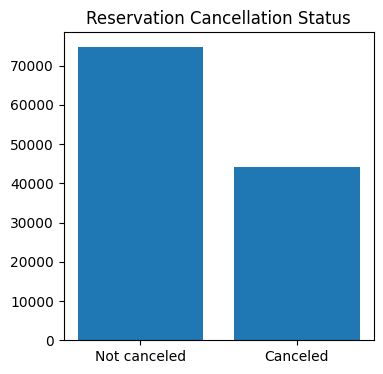

In [ ]:
plt.figure(figsize=(4,4))
plt.title('Reservation Cancellation Status')
plt.bar(['Not canceled','Canceled'], df['is_canceled'].value_counts())
plt.show()

The above graph shows the reservations that are cancelled and those that are not . There are still significant number of reservations that are not cancelled . But still 37% of the clients cancelled the reservation, which affects the hotel earnings

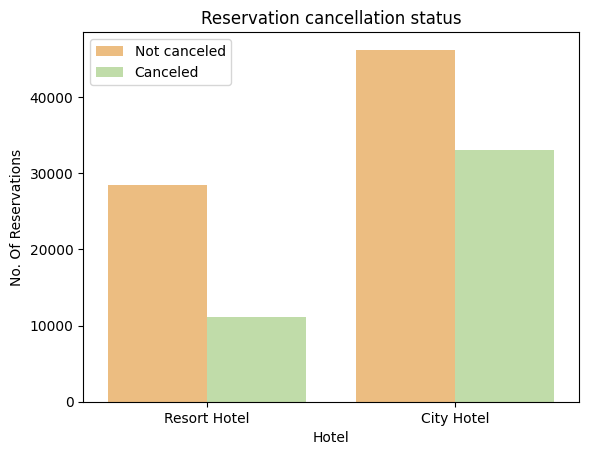

In [ ]:
ax = sns.countplot(x='hotel', hue= 'is_canceled', data=df, palette = "Spectral" )

legends_labels = ('Not canceled', 'Canceled')
ax.legend(loc='upper left', labels=legends_labels)

plt.title( 'Reservation cancellation status')
plt.xlabel('Hotel')
plt.ylabel('No. Of Reservations')
plt.show()

* From the above graph we saw that city hotels have more booking
and resort hotels have less because the of the price as Resort hotels are more expensive as compare to city hotels
* Also the cancellation rate in resort hotels are around 27% and in city hotels are 42%

In [ ]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.72025
1,0.27975


In [ ]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.582918
1,0.417082


In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

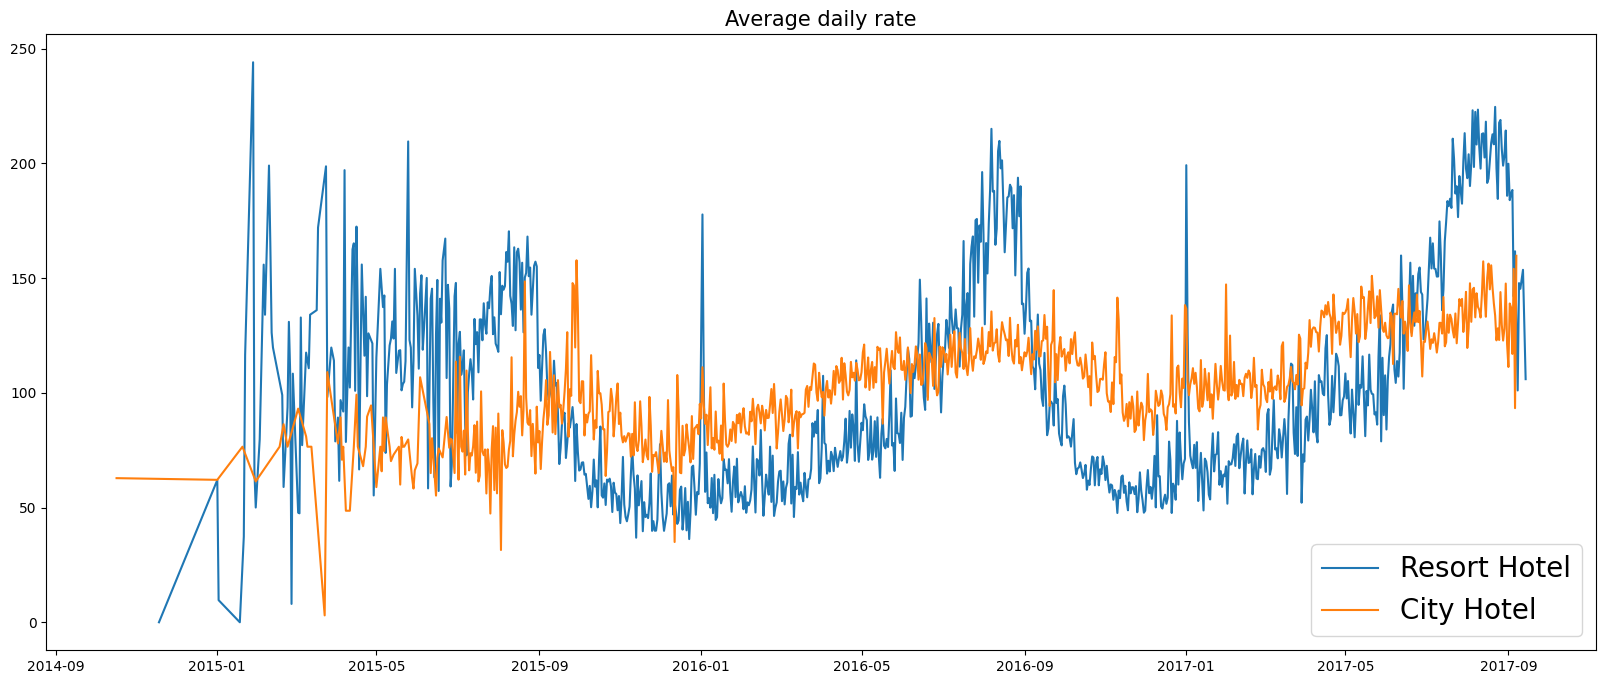

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Average daily rate', fontsize = 15)
plt.plot(resort_hotel.index, resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'],label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

The line graph shows on certain days the average daily rate for the city hotels is less then that of the resort hotels. On Weekends and holidays may see a rise in resort hotel rates.

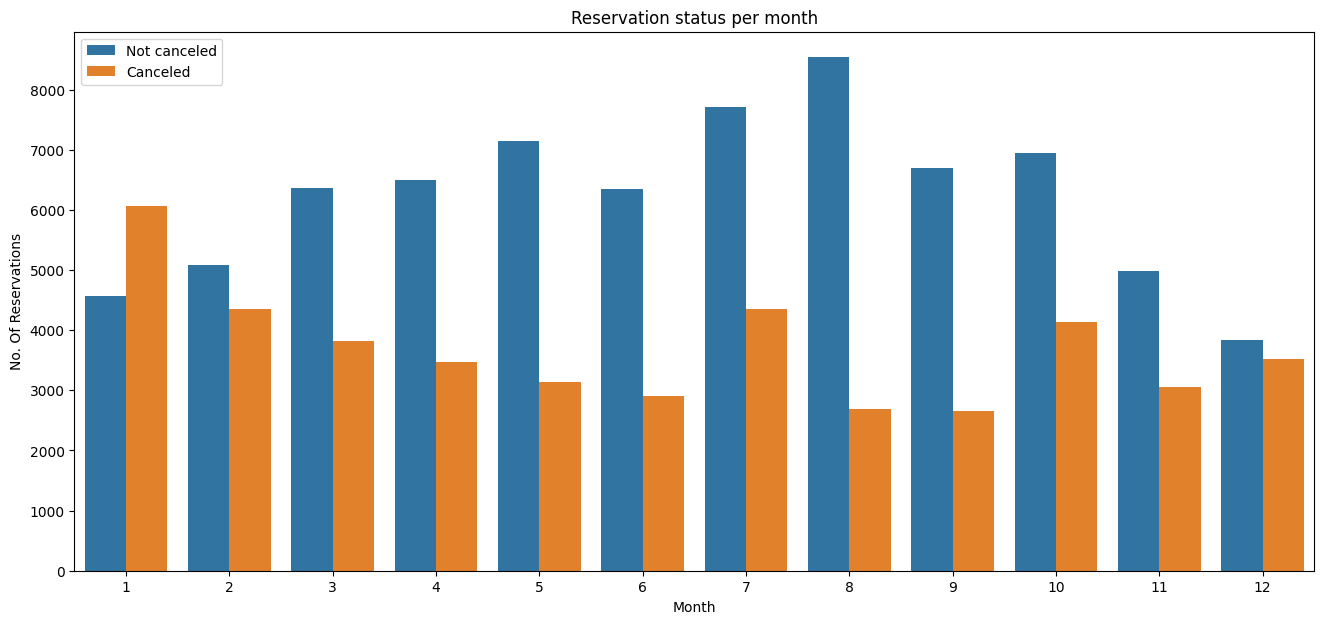

In [ ]:
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize = (16,7))
ax = sns.countplot(x = 'month', hue ='is_canceled',data = df)

legends_labels = ('Not canceled', 'Canceled')

ax.legend(loc='upper left', labels=legends_labels)

plt.title( 'Reservation status per month')
plt.xlabel('Month')
plt.ylabel('No. Of Reservations')

plt.show()

We devloped the group bar chart to analyse the month with the higest and the lowest reservation levels according to rservation status . As can be see both the no of confirmed reservation and the cancelled reservation that are largest in the month of August and January is the most cancelled reservations.

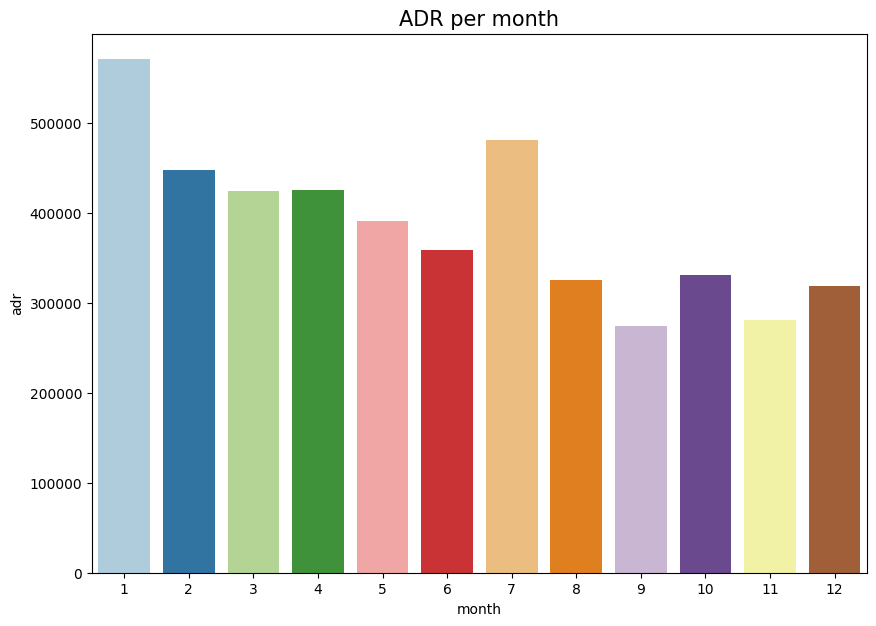

In [ ]:
plt.figure(figsize=(10,7))
plt.title('ADR per month', fontsize = 15)
sns.barplot(x='month', y ='adr',data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index(),palette ="Paired")
plt.show()

plt.show()

The above bar graph tells that the cancellation are more when the price are high and vice versa. Hence the cost of accomodation is responsible for the cancellation.

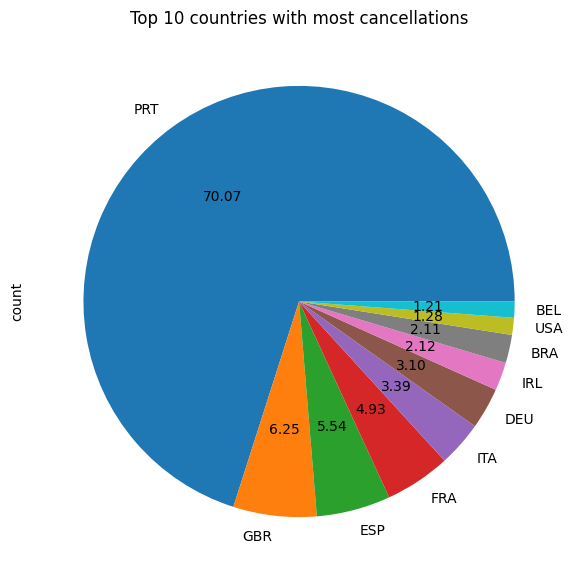

In [ ]:
cancelled_data = df[df['is_canceled']==1]

top_10_country = cancelled_data['country'].value_counts()[:10]

plt.figure(figsize=(7,7))
plt.title("Top 10 countries with most cancellations")
top_10_country.plot(kind = 'pie', autopct = '%.2f', labels = top_10_country.index)  # plt.pie = (top_10_countries,.....)

plt.show()

Portugal has maximum number of cancellation

In [ ]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56477
Offline TA/TO,24218
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [ ]:
df['market_segment'].value_counts(normalize = True)


,proportion
market_segment,
Online TA,0.473050
Offline TA/TO,0.202850
Groups,0.165937
Direct,0.105588
Corporate,0.044351
Complementary,0.006223
Aviation,0.001985
Undefined,0.000017


Around 46% of the clients are come from Online Travel Agencies and 27% are come from offline travel agencies and 4% of clients book hotels directly
in case of cancellation

Reason - for the maximum online cancellation because the room as not as shown in the photo or something related to this

In [ ]:
cancelled_data['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.468964
Groups,0.273545
Offline TA/TO,0.187911
Direct,0.043733
Corporate,0.022432
Complementary,0.002193
Aviation,0.001176
Undefined,0.000045


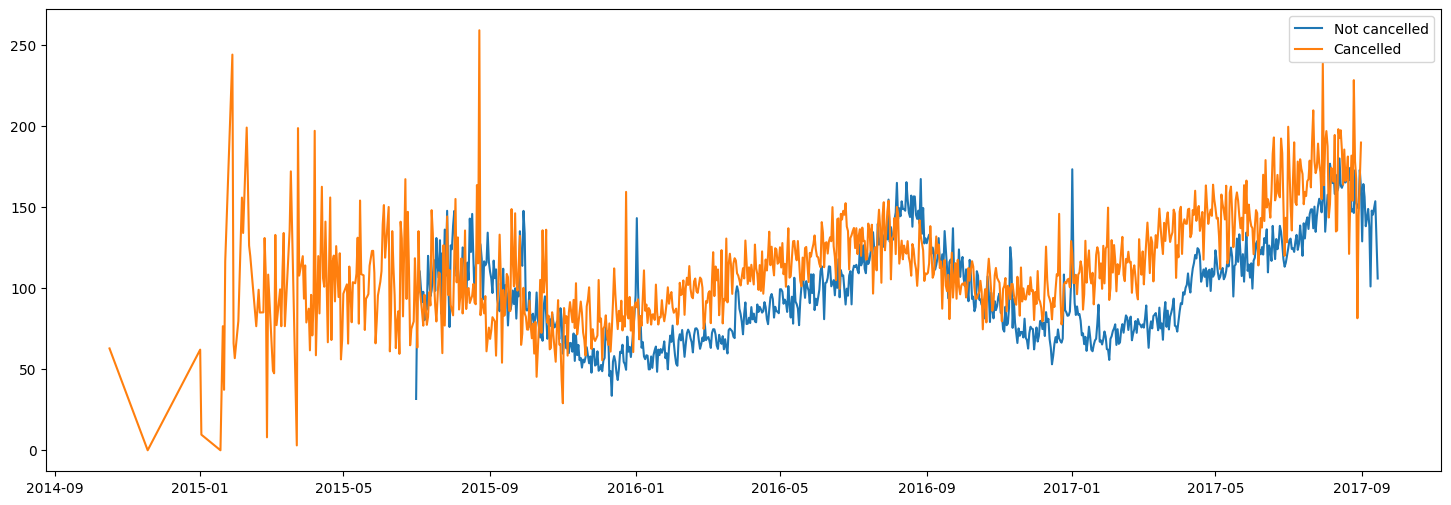

In [ ]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace= True)

not_cancelled_df = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_df.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace= True)

plt.figure(figsize=(18,6))
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend()
plt.show()

In [ ]:
cancelled_df_adr = cancelled_df_adr [(cancelled_df_adr['reservation_status_date']>'2016') &
                   (cancelled_df_adr['reservation_status_date']<'2017-09')]

not_cancelled_df_adr = not_cancelled_df_adr [(not_cancelled_df_adr['reservation_status_date']>'2016') &
                   (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

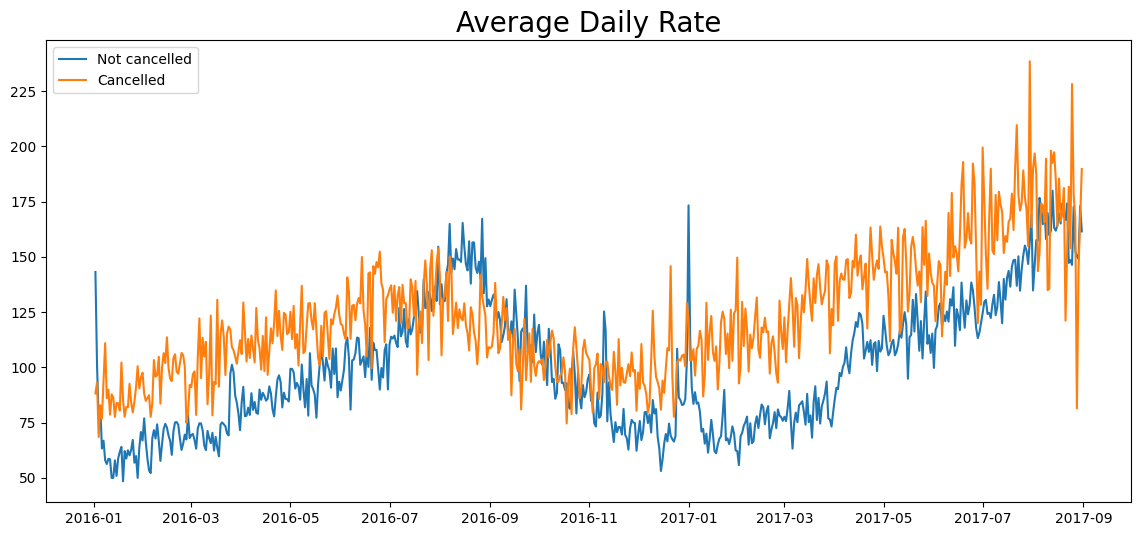

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'Cancelled')
plt.title('Average Daily Rate', fontsize = 20)
plt.legend()
plt.show()

As the above graph shows , reservation are cancelled when the average daily rate is higher then when it not cancelled . It clearly proves that
higher price leads to higher cancellation

# **Conclusion**
* Cancellation rates rises as the prices does. In order to prevent cancellation hotels could work on there pricing stratigies and try to lower the rates or give discount to the customers .
* In the month of January hotels start a campigns or do some influencer marketing to increase revenue as the cancellation is higest in this month
* As they can also increase the quality of their sevices mainly in portugal to reduce the cancellation .